In [1]:
# TensorFlow and tf.keras
import tensorflow as tf
import pandas as pd
# Helper libraries
import numpy as np
import matplotlib.pyplot as plt

import cv2
from keras.models import Sequential, load_model
from keras.utils import to_categorical
tf.__version__

'2.4.1'

In [2]:
from tensorflow import keras
from tensorflow.keras import layers
from keras.preprocessing.image import *
from keras import models 

In [3]:
df_train = pd.read_pickle("./train_data.pkl")
df_train.shape

(5216, 2)

In [4]:
df_valid = pd.read_pickle("./valid_data.pkl")
print('df_valid: ',df_valid.shape)
df_test = pd.read_pickle("./test_data.pkl")
print('df_test: ',df_test.shape)

df_valid:  (16, 2)
df_test:  (624, 2)


In [5]:
df_train['shape'] = df_train['matrix'].apply(lambda x: len(x.shape))

In [6]:
df_train.head()

,label,matrix,shape
0,0,"[[61, 63, 69, 75, 86, 85, 92, 89, 93, 96, 93, ...",2
1,1,"[[51, 53, 52, 52, 57, 55, 60, 61, 62, 62, 60, ...",2
2,1,"[[19, 20, 22, 27, 28, 30, 36, 40, 42, 46, 50, ...",2
3,0,"[[12, 12, 13, 13, 15, 14, 15, 16, 15, 12, 16, ...",2
4,1,"[[3, 3, 3, 2, 4, 13, 23, 25, 32, 43, 66, 64, 7...",2


In [7]:
x = df_train[df_train['shape'] ==3].iloc[0,1]

In [8]:
df_train.loc[df_train['shape'] ==3, 'matrix'] = df_train['matrix'].apply(lambda x: x.T[0].T)

In [9]:
X_test = df_test['matrix'].values
X_test = np.array([X_test[i] for i in range(X_test.shape[0])])/255.
X_test.shape

(624, 224, 224)

In [10]:
X_test = np.expand_dims(X_test, -1)
X_test.shape

(624, 224, 224, 1)

In [11]:
y_test = df_test.label.values

In [12]:
X_train = df_train['matrix'].values
X_train.shape

(5216,)

In [13]:
X_train = np.array([X_train[i] for i in range(X_train.shape[0])])
X_train.shape

(5216, 224, 224)

In [14]:
X_train = np.expand_dims(X_train, -1)
X_train.shape

(5216, 224, 224, 1)

In [15]:
num_classes = 2
y_train = df_train.label.values
# convert class vectors to binary class matrices
y_train = to_categorical(y_train, num_classes)
y_train.shape

(5216, 2)

In [16]:
X_train.shape, y_train.shape

((5216, 224, 224, 1), (5216, 2))

In [17]:
from sklearn.model_selection import train_test_split
X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

In [18]:
X_train.shape, y_train.shape

((4172, 224, 224, 1), (4172, 2))

In [19]:
datagen = ImageDataGenerator(rescale=1/255,
                             rotation_range=20,
                             horizontal_flip=True,
                             height_shift_range=0.1,
                             width_shift_range=0.1,
                             shear_range=0.1,
                             brightness_range=[0.3, 1.5])

In [20]:
train_gen = datagen.flow(X_train,y_train)

In [21]:
#num_classes = 2
model_convolution = tf.keras.models.Sequential([
  layers.Conv2D(32, kernel_size=(3, 3), activation="relu",name='conv1',input_shape=(224, 224, 1)),
  layers.MaxPooling2D(pool_size=(2, 2),name='pool1'),
  layers.Conv2D(64, kernel_size=(3, 3), activation="relu",name='conv2'),
  layers.MaxPooling2D(pool_size=(2, 2),name='pool2'),
  layers.Flatten(),
  layers.Dropout(0.3),
  layers.Dense(20,activation="relu",name='Dense1'),
  layers.Dropout(0.1),
  tf.keras.layers.Dense(num_classes, activation="softmax")])

In [22]:
model_convolution.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1 (Conv2D)               (None, 222, 222, 32)      320       
_________________________________________________________________
pool1 (MaxPooling2D)         (None, 111, 111, 32)      0         
_________________________________________________________________
conv2 (Conv2D)               (None, 109, 109, 64)      18496     
_________________________________________________________________
pool2 (MaxPooling2D)         (None, 54, 54, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 186624)            0         
_________________________________________________________________
dropout (Dropout)            (None, 186624)            0         
_________________________________________________________________
Dense1 (Dense)               (None, 20)                3

In [23]:
batch_size = 16
epochs = 50
model_convolution.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

In [24]:
history = model_convolution.fit(train_gen, batch_size=batch_size, epochs=epochs,validation_data=(X_valid, y_valid))

Epoch 1/50
131/131 [==============================] - 32s 210ms/step - loss: 0.6312 - accuracy: 0.7284 - val_loss: 3.7247 - val_accuracy: 0.9004
Epoch 2/50
131/131 [==============================] - 24s 184ms/step - loss: 0.3067 - accuracy: 0.8851 - val_loss: 11.2120 - val_accuracy: 0.9013
Epoch 3/50
131/131 [==============================] - 29s 223ms/step - loss: 0.3042 - accuracy: 0.8770 - val_loss: 4.6343 - val_accuracy: 0.9167
Epoch 4/50
131/131 [==============================] - 36s 276ms/step - loss: 0.2748 - accuracy: 0.8953 - val_loss: 18.9283 - val_accuracy: 0.8870
Epoch 5/50
131/131 [==============================] - 36s 277ms/step - loss: 0.2439 - accuracy: 0.8992 - val_loss: 18.8315 - val_accuracy: 0.9310
Epoch 6/50
131/131 [==============================] - 36s 275ms/step - loss: 0.2362 - accuracy: 0.9063 - val_loss: 20.3063 - val_accuracy: 0.8918
Epoch 7/50
131/131 [==============================] - 35s 268ms/step - loss: 0.2343 - accuracy: 0.9117 - val_loss: 11.4165 - v

In [25]:
model_convolution.save("model_agmentation_2")
np.save('model_agmentation_2_history.npy',history.history)

INFO:tensorflow:Assets written to: model_agmentation_2\assets


In [26]:
load_history=np.load('model_agmentation_2_history.npy',allow_pickle='TRUE').item()
reconstructed_model = load_model("model_agmentation_2")
reconstructed_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1 (Conv2D)               (None, 222, 222, 32)      320       
_________________________________________________________________
pool1 (MaxPooling2D)         (None, 111, 111, 32)      0         
_________________________________________________________________
conv2 (Conv2D)               (None, 109, 109, 64)      18496     
_________________________________________________________________
pool2 (MaxPooling2D)         (None, 54, 54, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 186624)            0         
_________________________________________________________________
dropout (Dropout)            (None, 186624)            0         
_________________________________________________________________
Dense1 (Dense)               (None, 20)                3

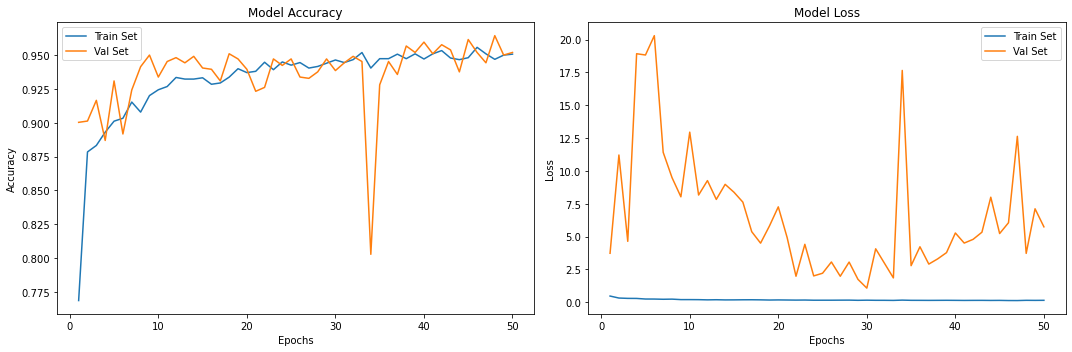

In [27]:
# plot model performance
acc = load_history['accuracy']
val_acc = load_history['val_accuracy']
loss = load_history['loss']
val_loss = load_history['val_loss']
epochs_range = range(1, len(history.epoch) + 1)

plt.figure(figsize=(15,5))

plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Train Set')
plt.plot(epochs_range, val_acc, label='Val Set')
plt.legend(loc="best")
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Model Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Train Set')
plt.plot(epochs_range, val_loss, label='Val Set')
plt.legend(loc="best")
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Model Loss')

plt.tight_layout()
plt.show()

In [33]:
#List of metric for classiffication models
def metrics_classific(y, predicted, proba_predictions):
    from sklearn.metrics import confusion_matrix, classification_report, precision_recall_curve, f1_score, auc
    from matplotlib import pyplot
    confusion_matrix = confusion_matrix(y, predicted)
    print(confusion_matrix)
    print(classification_report(y, predicted))
    
    # keep probabilities for the positive outcome only
    lr_probs = proba_predictions[:, 1]
    
    # calculate precision and recall for each threshold
    lr_precision, lr_recall, _ = precision_recall_curve(y, lr_probs)

    # calculate scores
    lr_f1, lr_auc = f1_score(y, predicted), auc(lr_recall, lr_precision)

    # summarize scores
    print('Logistic: f1=%.3f auc=%.3f' % (lr_f1, lr_auc))

    #plot the precision-recall curves
    no_skill = len(y[y == 1]) / len(y)
    pyplot.plot([0, 1], [no_skill, no_skill], linestyle='--', label='No Skill')
    pyplot.plot(lr_recall, lr_precision, marker='.', label='Logistic')
    # axis labels
    pyplot.xlabel('Recall')
    pyplot.ylabel('Precision')
    # show the legend
    pyplot.legend()
    # show the plot
    pyplot.show()

[[168  66]
 [ 48 342]]
              precision    recall  f1-score   support

           0       0.78      0.72      0.75       234
           1       0.84      0.88      0.86       390

    accuracy                           0.82       624
   macro avg       0.81      0.80      0.80       624
weighted avg       0.82      0.82      0.82       624

Logistic: f1=0.857 auc=0.940


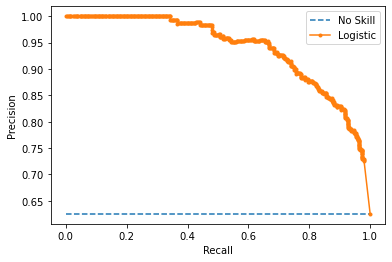

In [47]:
proba_predictions = reconstructed_model.predict(X_test)
predictions = (prob_predictions[:,1] >=0.75).astype(int)

y_test = df_test.label.values

metrics_classific(y_test, predictions, proba_predictions)